### 1. Read the train Dataset.

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


### 2. Check missing values in df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [4]:
s = df.isna().sum()
s

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
df.nunique()

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

### 3. Seperate X and Y (Drop statistically insignificant)

In [6]:
X = df.drop(columns=['Product ID','Torque [Nm]','Tool wear [min]'])
Y = df[['Tool wear [min]']]

In [7]:
X.head()

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L,300.6,309.6,1596,0,0,0,0,0,0
1,1,M,302.6,312.1,1759,0,0,0,0,0,0
2,2,L,299.3,308.5,1805,0,0,0,0,0,0
3,3,L,301.0,310.9,1524,0,0,0,0,0,0
4,4,M,298.0,309.0,1641,0,0,0,0,0,0


### 4. Cat Con Seperation

In [8]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [9]:
cat

['Type']

In [10]:
con

['id',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

### 5. Create Sklearn pipeline for feature selection (Ordinal)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [12]:
# Numeric pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

# Categorical Pipeline
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant', fill_value='unknown')),
                           ('ordinal',OrdinalEncoder())])

# Combine cat and con pipelines
pre1 = ColumnTransformer([('num',num_pipe, con),
                          ('cat',cat_pipe, cat)])

In [13]:
X_pre = pre1.fit_transform(X)
X_pre

array([[-1.73203811,  0.3958803 , -0.24623038, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.73201272,  1.46985559,  1.55860483, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-1.73198733, -0.30220363, -1.04035788, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 1.73198733,  0.34218154,  1.34202461, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.73201272,  0.98656671,  0.69228393, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.73203811, -1.59097397, -1.32913151, ..., -0.06303833,
        -0.04756777,  1.        ]])

In [14]:
cols = pre1.get_feature_names_out()
cols

array(['num__id', 'num__Air temperature [K]',
       'num__Process temperature [K]', 'num__Rotational speed [rpm]',
       'num__Machine failure', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type'], dtype=object)

In [15]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__id,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Machine failure,num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,-1.732038,0.395880,-0.246230,0.545416,-0.126477,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,-1.732013,1.469856,1.558605,1.720308,-0.126477,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-1.731987,-0.302204,-1.040358,2.051873,-0.126477,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,-1.731962,0.610675,0.692284,0.026445,-0.126477,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.731937,-1.000288,-0.679391,0.869773,-0.126477,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


### 6. Find Mutual Info Scores

In [16]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([0.        , 0.25307486, 0.20431252, 0.11545457, 0.00736849,
       0.00717119, 0.00455157, 0.00442961, 0.00792563, 0.0015758 ,
       0.0116573 ])

In [17]:
mi = pd.Series(mi)
mi.index = cols
mi = mi.sort_values(ascending=False)
mi

num__Air temperature [K]        0.253075
num__Process temperature [K]    0.204313
num__Rotational speed [rpm]     0.115455
cat__Type                       0.011657
num__OSF                        0.007926
num__Machine failure            0.007368
num__TWF                        0.007171
num__HDF                        0.004552
num__PWF                        0.004430
num__RNF                        0.001576
num__id                         0.000000
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

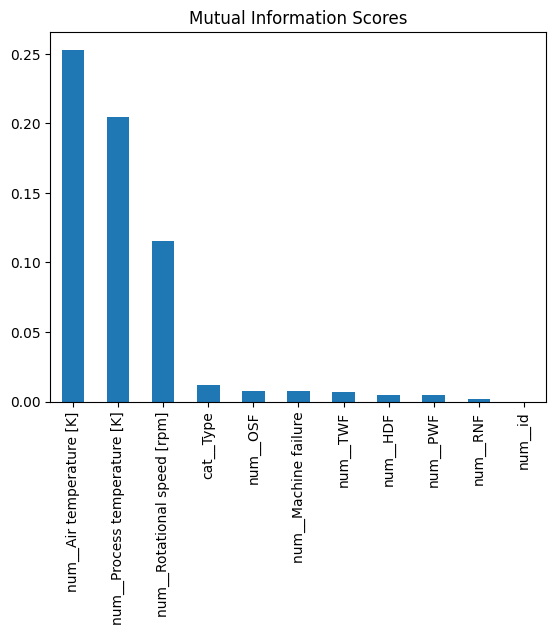

In [18]:
mi.plot(kind='bar',title='Mutual Information Scores')

In [19]:
sel_cols = list(mi[0:6].index)
sel_cols

['num__Air temperature [K]',
 'num__Process temperature [K]',
 'num__Rotational speed [rpm]',
 'cat__Type',
 'num__OSF',
 'num__Machine failure']

In [20]:
# Approach 2 Select top n features
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(mutual_info_classif,k=6)
sel_features = sel.fit_transform(X_pre, Y)

In [21]:
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Machine failure', 'num__HDF',
       'cat__Type'], dtype=object)

In [22]:
sel_cols[0].split('__')[1]

'Air temperature [K]'

In [23]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [24]:
imp_cols

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Machine failure',
 'HDF',
 'Type']

In [25]:
X_sel = X[imp_cols]

In [26]:
X_sel

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Machine failure,HDF,Type
0,300.6,309.6,1596,0,0,L
1,302.6,312.1,1759,0,0,M
2,299.3,308.5,1805,0,0,L
3,301.0,310.9,1524,0,0,L
4,298.0,309.0,1641,0,0,M
...,...,...,...,...,...,...
136424,300.1,311.4,1530,0,0,M
136425,297.5,308.5,1447,0,0,H
136426,300.5,311.8,1524,0,0,L
136427,301.7,310.9,1447,0,0,L


In [27]:
## Cat , con for Selected features
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [28]:
cat

['Type']

In [29]:
con

['id',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

### 7. Build the final sklearn pipeline (Onehotencoder)

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
num_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num',num_pipe2, con_sel),
                          ('cat',cat_pipe2, cat_sel)])


In [32]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ...,  0.        ,
         0.        ,  1.        ],
       [-0.30220363, -1.04035788,  2.05187289, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ...,  0.        ,
         1.        ,  0.        ],
       [-1.59097397, -1.32913151,  0.26430672, ...,  0.        ,
         1.        ,  0.        ]])

In [33]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Machine failure', 'num__HDF',
       'cat__Type_H', 'cat__Type_L', 'cat__Type_M'], dtype=object)

In [34]:
X_sel_pre = pd.DataFrame(X_sel_pre, columns=final_cols)
X_sel_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Machine failure,num__HDF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.126477,-0.072021,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-0.126477,-0.072021,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-0.126477,-0.072021,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,-0.126477,-0.072021,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.126477,-0.072021,0.0,0.0,1.0


In [35]:
# Train Test Split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=42)

In [36]:
xtrain.shape

(109143, 8)

In [37]:
xtest.shape

(27286, 8)

### 8. Algo Evaluation

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [45]:
dct = {'LogisticRegression':LogisticRegression(),
       'DecisionTree':DecisionTreeClassifier(),
       'RandomForest':RandomForestClassifier(),
       'GradientBoosting':GradientBoostingClassifier(),
       'SVM':SVC()}

In [46]:
dct.items()

dict_items([('LogisticRegression', LogisticRegression()), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('GradientBoosting', GradientBoostingClassifier()), ('SVM', SVC())])

In [47]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    # Fit the model on training data
    model.fit(xtrain, ytrain)

    # Predict train and test results
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)

    # Calculate F1 scores Training
    f1_tr = f1_score(ytrain, ypred_tr)

    # Calculate F1 Cross validated results
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1')
    f1_tr_cv = scores.mean()

    # Calculate F1 score in testing
    f1_ts = f1_score(ytest, ypred_ts)

    # Append all values in list
    tr.append(f1_tr)
    tr_cv.append(f1_tr_cv)
    ts.append(f1_ts)

     # Print the results
    print(f'Model Name : {name}\n')
    print(f'F1 Training : {f1_tr:.4f}')
    print(f'F1 Training CV : {f1_tr_cv:.4f}')
    print(f'F1 Testing : {f1_ts:.4f}')
    print('\n===========================================\n')

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].